
# Decision Tree trong Học máy

## Cài đặt và tải các thư viện cần thiết

In [1]:
# Cài đặt các package nếu chưa cài
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("rpart")) install.packages("rpart")
if (!require("rpart.plot")) install.packages("rpart.plot")
if (!require("caret")) install.packages("caret")

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: rpart

Loading required package: rpart.plot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rpart.plot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“the

In [2]:
# Tải các thư viện
library(tidyverse)  # Xử lý dữ liệu
library(rpart)      # Thư viện chính cho cây quyết định
library(rpart.plot) # Vẽ cây quyết định
library(caret)      # Cho machine learning và đánh giá mô hình

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




## 1. Khái niệm cơ bản về Cây quyết định

Cây quyết định là mô hình học máy dạng cây với:
- **Nút gốc (Root node)**: Đỉnh của cây, bắt đầu phân chia dữ liệu
- **Nút nội (Internal nodes)**: Chứa các quyết định dựa trên đặc trưng
- **Nút lá (Leaf nodes)**: Chứa kết quả dự đoán
- **Nhánh (Branches)**: Kết nối giữa các nút

### Ưu điểm:
- Dễ hiểu và diễn giải
- Xử lý được nhiều loại dữ liệu
- Ít yêu cầu tiền xử lý
- Có thể xử lý dữ liệu thiếu

### Hạn chế:
- Dễ bị overfitting
- Không ổn định với thay đổi nhỏ trong dữ liệu
- Hiệu suất có thể thấp hơn các mô hình phức tạp

## 2. Hiểu về bộ dữ liệu iris

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

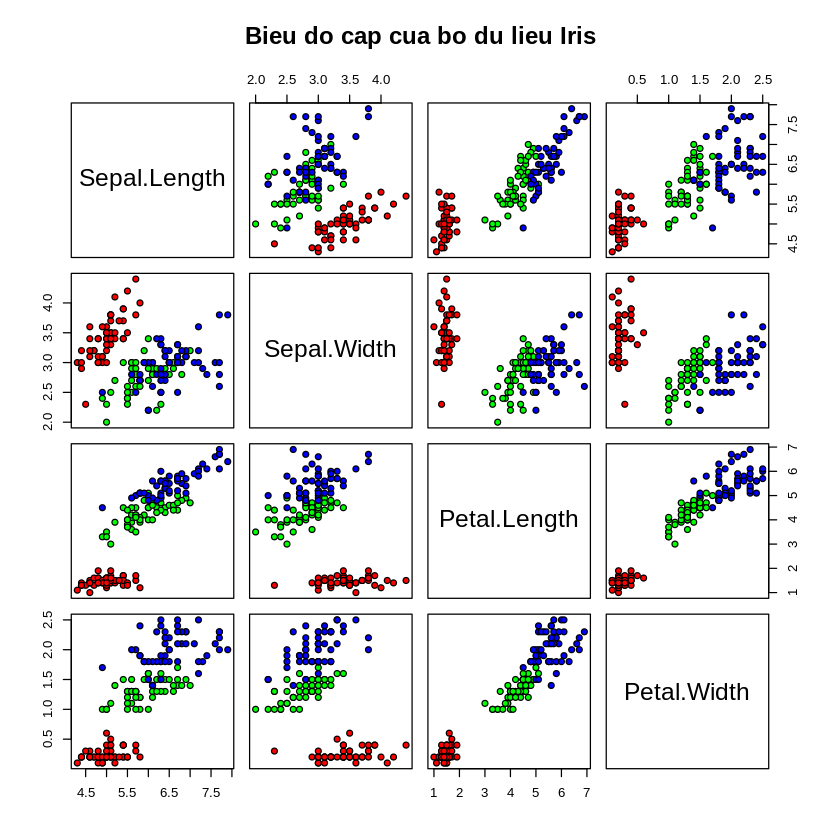

In [3]:
# Xem cấu trúc bộ dữ liệu
str(iris)

# Một số thống kê cơ bản
summary(iris)

# Trực quan hóa dữ liệu
pairs(iris[1:4], main = "Bieu do cap cua bo du lieu Iris",
      pch = 21, bg = c("red", "green", "blue")[unclass(iris$Species)])
legend("bottom", horiz = TRUE, legend = levels(iris$Species),
       fill = c("red", "green", "blue"))

## 3. Xây dựng Cây quyết định đơn giản

In [4]:
# Phân chia dữ liệu
set.seed(123)
train_index <- sample(1:nrow(iris), 0.8 * nrow(iris))
train_data <- iris[train_index, ]
test_data <- iris[-train_index, ]

In [5]:
# Xây dựng mô hình cây quyết định
tree_model <- rpart(Species ~ ., data = train_data, method = "class")

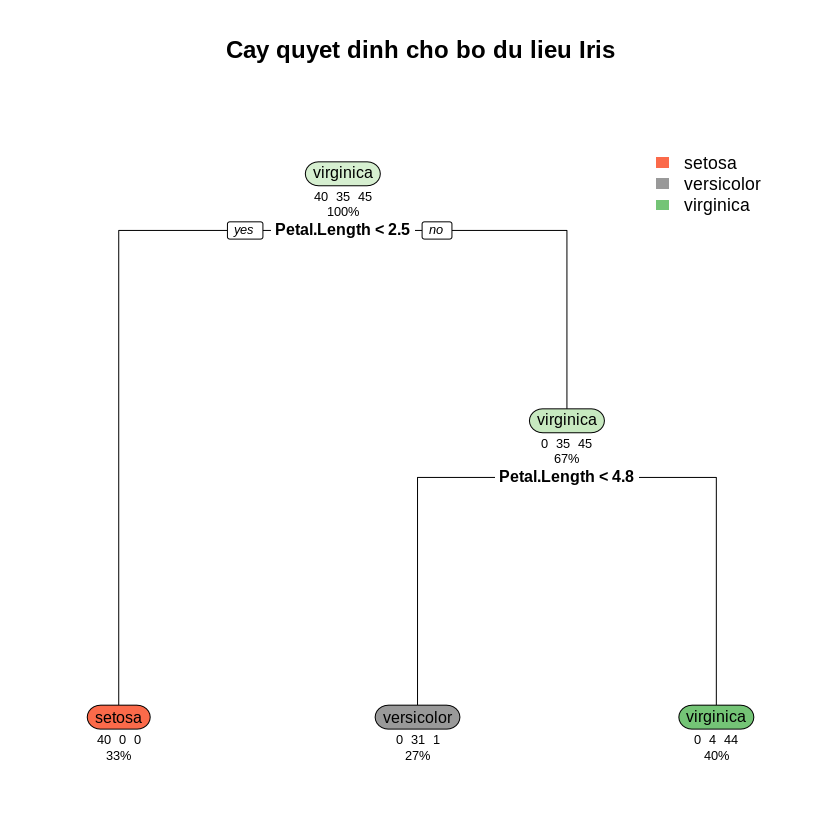

In [6]:
# Vẽ cây quyết định
rpart.plot(tree_model, main = "Cay quyet dinh cho bo du lieu Iris",
           extra = 101, under = TRUE, cex = 0.8)

In [7]:
# Dự đoán trên tập kiểm tra
predictions <- predict(tree_model, newdata = test_data, type = "class")

In [8]:
# Tạo ma trận nhầm lẫn
conf_matrix <- table(Thuc_te = test_data$Species, Du_doan = predictions)
print(conf_matrix)

# Đánh giá độ chính xác
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
cat("Do chinh xac:", round(accuracy * 100, 2), "%\n")

# Đánh giá chi tiết
evaluation <- confusionMatrix(predictions, test_data$Species)
print(evaluation)

            Du_doan
Thuc_te      setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         13         2
  virginica       0          0         5
Do chinh xac: 93.33 %
Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         13         0
  virginica       0          2         5

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 4.34e-07        
                                          
                  Kappa : 0.8947          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8667           1.0000
Speci

CART 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 96, 96, 96, 96, 96 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.01  0.9416667  0.9117001
  0.02  0.9416667  0.9117001
  0.03  0.9416667  0.9117001
  0.04  0.9416667  0.9117001
  0.05  0.9416667  0.9117001
  0.06  0.9416667  0.9117001
  0.07  0.9416667  0.9117001
  0.08  0.9416667  0.9117001
  0.09  0.9416667  0.9117001
  0.10  0.9416667  0.9117001

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.1.


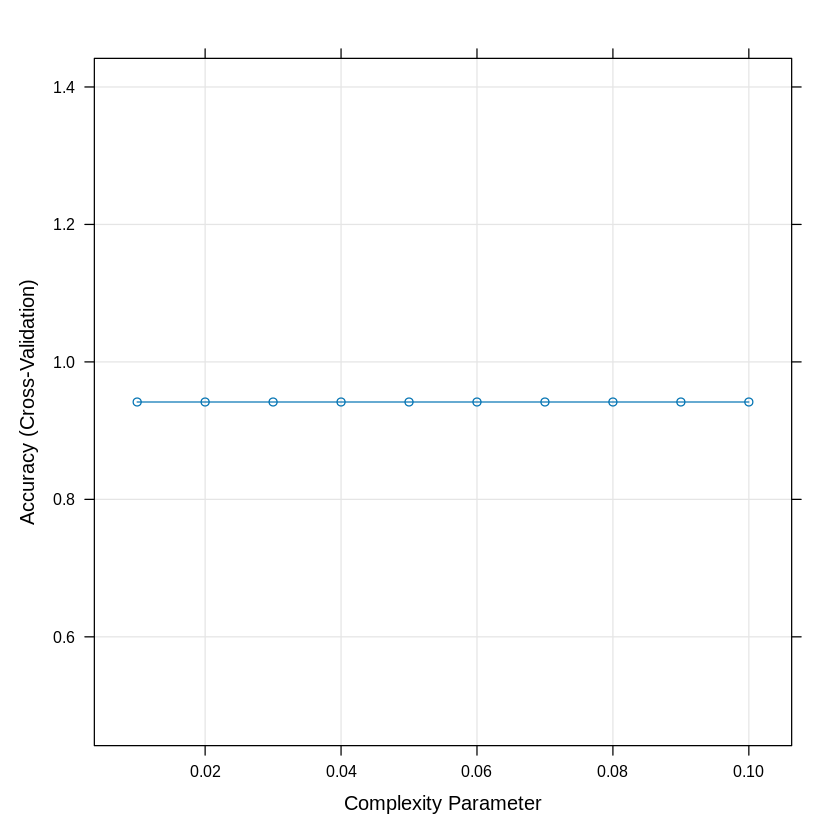

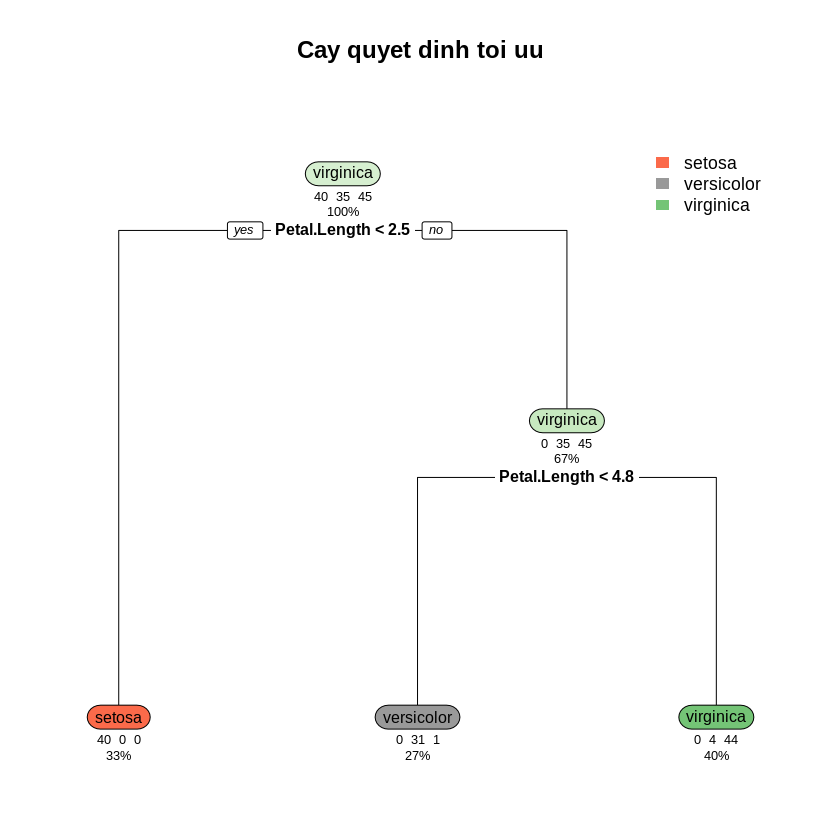

In [10]:
## 5. Điều chỉnh tham số (Hyperparameter Tuning)

# Tạo lưới tham số để tìm kiếm
param_grid <- expand.grid(
  cp = seq(0.01, 0.1, by = 0.01)  # complexity parameter
)

# Thiết lập cross-validation
train_control <- trainControl(
  method = "cv",
  number = 5
)

# Huấn luyện mô hình với các tham số khác nhau
tuned_model <- train(
  Species ~ .,
  data = train_data,
  method = "rpart",
  trControl = train_control,
  tuneGrid = param_grid
)

# In kết quả tìm kiếm tham số
print(tuned_model)
plot(tuned_model)

# Lấy mô hình tốt nhất
best_tree <- tuned_model$finalModel

# Vẽ cây quyết định tốt nhất
rpart.plot(best_tree, main = "Cay quyet dinh toi uu",
           extra = 101, under = TRUE, cex = 0.8)

In [11]:
## 6. Phân tích tầm quan trọng của đặc trưng

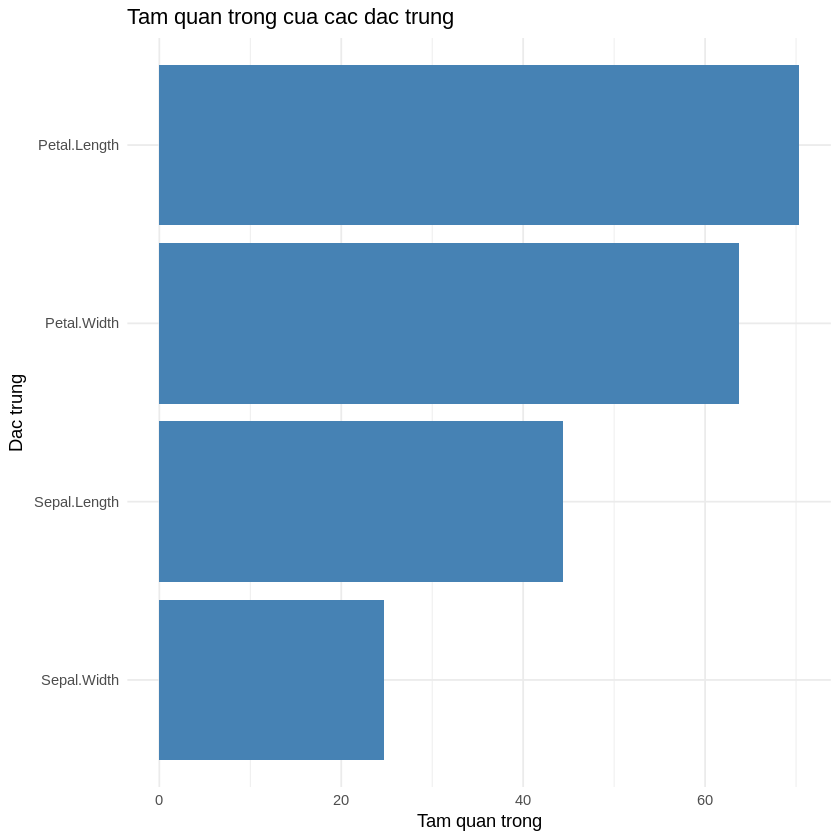

In [12]:
# Xem tầm quan trọng của các đặc trưng
var_importance <- best_tree$variable.importance
var_importance <- data.frame(
  Feature = names(var_importance),
  Importance = var_importance
)

# Sắp xếp theo tầm quan trọng giảm dần
var_importance <- var_importance[order(-var_importance$Importance), ]

# Vẽ biểu đồ tầm quan trọng
ggplot(var_importance, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Tam quan trong cua cac dac trung",
       x = "Dac trung",
       y = "Tam quan trong") +
  theme_minimal()

In [13]:
## 7. Cải thiện với kỹ thuật cắt tỉa (Pruning)

CP toi uu: 0 


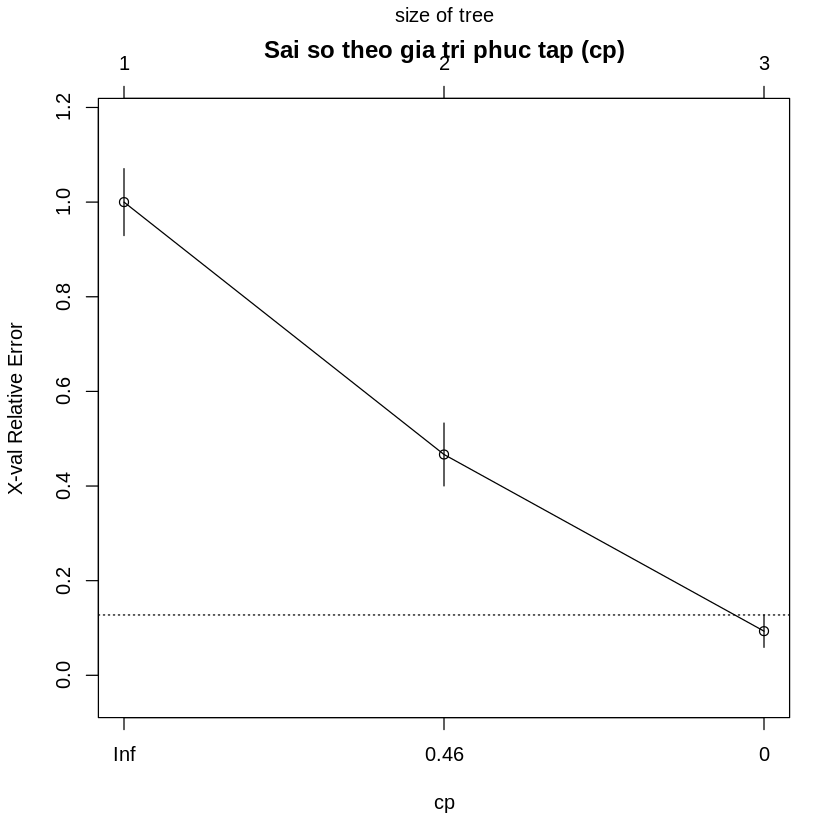

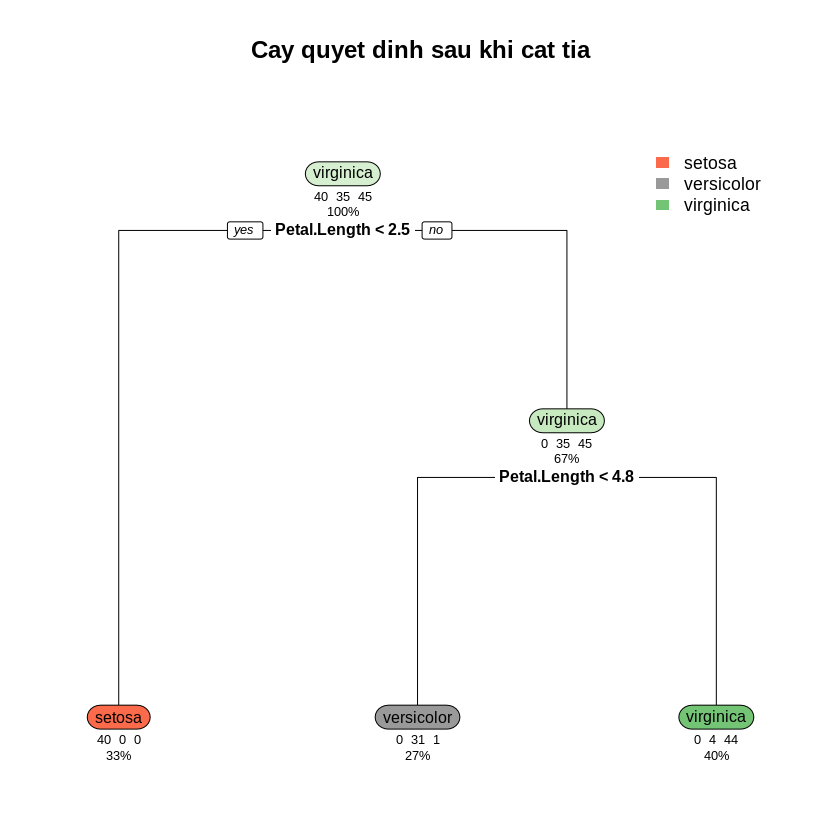

In [14]:
# Xây dựng cây đầy đủ
full_tree <- rpart(Species ~ ., data = train_data, method = "class",
                  control = rpart.control(cp = 0))

# Vẽ biểu đồ cp để quyết định mức độ cắt tỉa
plotcp(full_tree, main = "Sai so theo gia tri phuc tap (cp)")

# Chọn giá trị cp tối ưu
optimal_cp <- full_tree$cptable[which.min(full_tree$cptable[,"xerror"]),"CP"]
cat("CP toi uu:", optimal_cp, "\n")

# Cắt tỉa cây
pruned_tree <- prune(full_tree, cp = optimal_cp)

# Vẽ cây sau khi cắt tỉa
rpart.plot(pruned_tree, main = "Cay quyet dinh sau khi cat tia",
           extra = 101, under = TRUE, cex = 0.8)

In [16]:
## 8. Ứng dụng với bộ dữ liệu mtcars
# Chuẩn bị dữ liệu
mtcars$am <- as.factor(mtcars$am)  # Chuyển am thành factor
mtcars$vs <- as.factor(mtcars$vs)  # Chuyển vs thành factor
mtcars$cyl <- as.factor(mtcars$cyl)  # Chuyển cyl thành factor

# Phân chia dữ liệu
set.seed(123)
train_index_cars <- sample(1:nrow(mtcars), 0.7 * nrow(mtcars))
train_cars <- mtcars[train_index_cars, ]
test_cars <- mtcars[-train_index_cars, ]

In [17]:
# Xây dựng mô hình cây quyết định
tree_cars <- rpart(am ~ ., data = train_cars, method = "class")

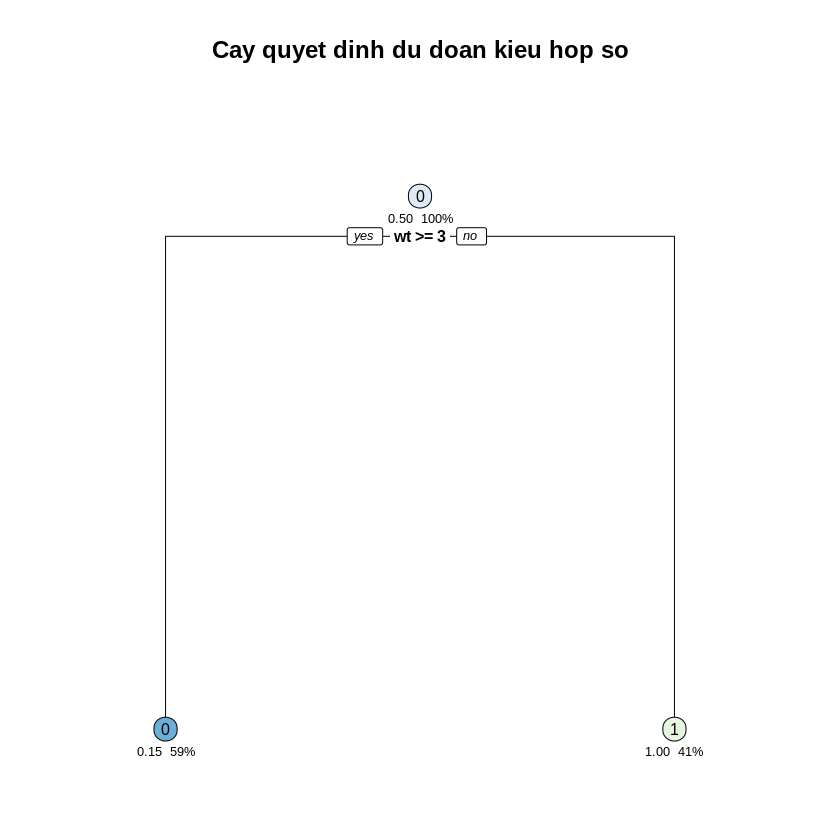

In [18]:
# Vẽ cây quyết định
rpart.plot(tree_cars, main = "Cay quyet dinh du doan kieu hop so",
           extra = 106, under = TRUE, cex = 0.8)

In [19]:
# Dự đoán và đánh giá
pred_cars <- predict(tree_cars, newdata = test_cars, type = "class")
conf_matrix_cars <- table(Thuc_te = test_cars$am, Du_doan = pred_cars)
print(conf_matrix_cars)

# Độ chính xác
accuracy_cars <- sum(diag(conf_matrix_cars)) / sum(conf_matrix_cars)
cat("Do chinh xac:", round(accuracy_cars * 100, 2), "%\n")

       Du_doan
Thuc_te 0 1
      0 7 1
      1 0 2
Do chinh xac: 90 %


RMSE: 3.02 


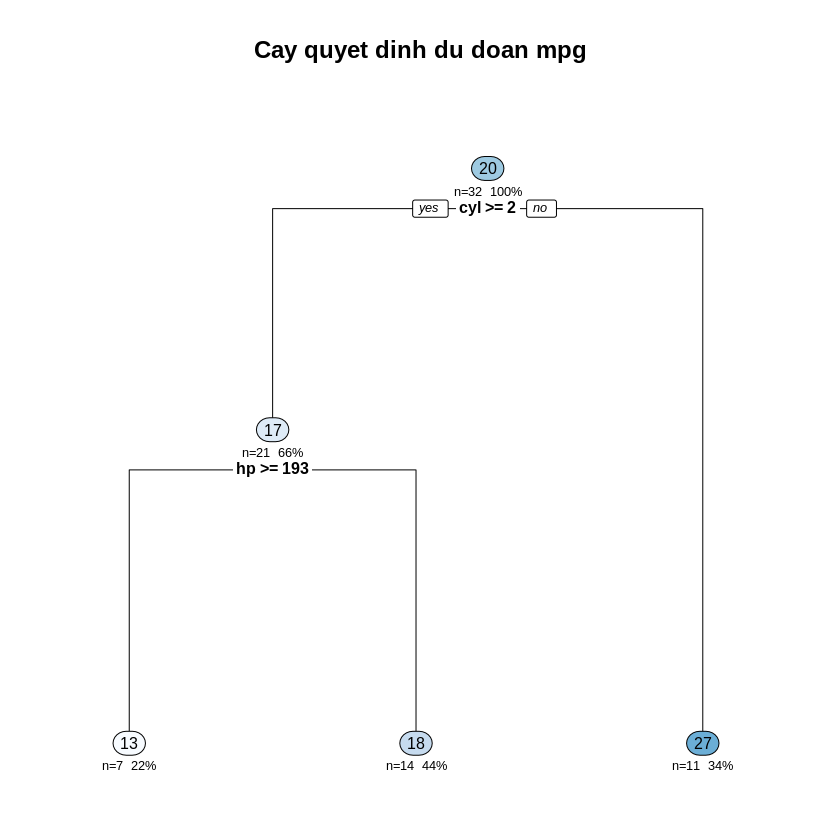

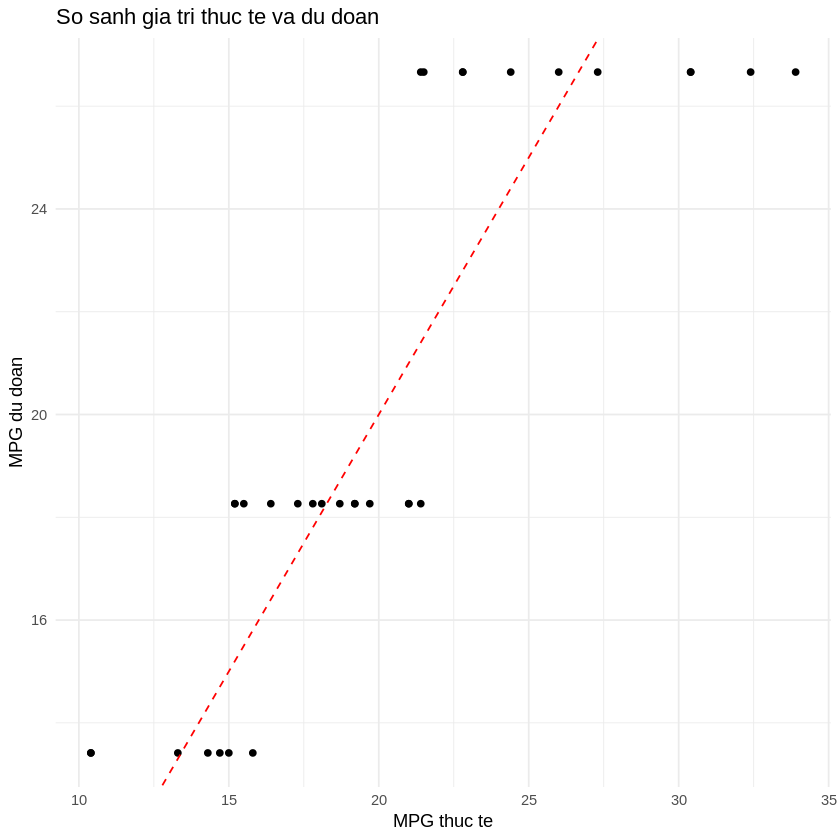

In [20]:
# Sử dụng mtcars để dự đoán mpg (tiêu thụ nhiên liệu)
# Chuẩn bị dữ liệu cho hồi quy
mtcars_reg <- mtcars
mtcars_reg$am <- as.numeric(mtcars$am)
mtcars_reg$vs <- as.numeric(mtcars$vs)
mtcars_reg$cyl <- as.numeric(mtcars$cyl)

# Xây dựng mô hình cây hồi quy
tree_reg <- rpart(mpg ~ ., data = mtcars_reg, method = "anova")

# Vẽ cây hồi quy
rpart.plot(tree_reg, main = "Cay quyet dinh du doan mpg",
           extra = 101, under = TRUE, cex = 0.8)

# Dự đoán
pred_mpg <- predict(tree_reg, newdata = mtcars_reg)

# Đánh giá hiệu suất
mse <- mean((mtcars_reg$mpg - pred_mpg)^2)
rmse <- sqrt(mse)
cat("RMSE:", round(rmse, 2), "\n")

# Biểu đồ so sánh
prediction_data <- data.frame(
  Thuc_te = mtcars_reg$mpg,
  Du_doan = pred_mpg
)

ggplot(prediction_data, aes(x = Thuc_te, y = Du_doan)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "So sanh gia tri thuc te va du doan",
       x = "MPG thuc te",
       y = "MPG du doan") +
  theme_minimal()